In [1]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
from ens_util import *
from math import isnan
from sklearn.calibration import calibration_curve
plt.rcParams['figure.figsize'] = [9, 9]

In [2]:
data_files = glob('data_crop*.nc')
coordx = [258,260]
coordy = [63,65]
thresh = 0.2
data = build_datadf(data_files,coordx,coordy)
(fr15,fr30,fr45,fr60) = build_benchmark_fractions(data_files,data.index,thresh)


data_crop_04_02.nc
data_crop_04_05.nc
data_crop_04_09.nc
data_crop_04_10.nc
data_crop_04_11.nc
data_crop_04_12.nc
data_crop_04_15.nc
data_crop_04_18.nc
data_crop_04_19.nc
data_crop_04_20.nc
data_crop_04_21.nc
data_crop_04_22.nc
data_crop_04_25.nc
data_crop_04_26.nc
data_crop_05_05.nc
data_crop_05_06.nc
data_crop_05_07.nc
data_crop_05_08.nc
data_crop_05_09.nc
data_crop_05_19.nc
data_crop_05_20.nc
data_crop_05_21.nc
data_crop_05_22.nc
data_crop_05_23.nc
data_crop_05_24.nc
data_crop_05_25.nc
data_crop_05_29.nc
data_crop_05_30.nc
data_crop_06_03.nc
data_crop_06_10.nc
data_crop_06_11.nc
data_crop_06_12.nc
data_crop_06_14.nc
data_crop_06_15.nc
data_crop_06_16.nc
data_crop_06_17.nc
data_crop_06_18.nc
data_crop_06_19.nc
data_crop_06_22.nc


In [3]:
index_dates = data.index.date
index_dates_unique = np.unique(index_dates)
index_times = data.index
bs15 = pd.DataFrame(index=index_dates_unique,columns=data.columns)
bs30 = pd.DataFrame(index=index_dates_unique,columns=data.columns)
bs45 = pd.DataFrame(index=index_dates_unique,columns=data.columns)
bs60 = pd.DataFrame(index=index_dates_unique,columns=data.columns)
bs = [bs15,bs30,bs45,bs60]
fr = [fr15,fr30,fr45,fr60]

for c in data.columns:
    for d in index_dates_unique:
        times = np.array(index_times[np.where(index_dates==d)[0]])
        for f in range(4):
            #number of valid (non NaN) contributions to BS.
            count = 0
            bs_val = 0
            for t in times:
                frac = fr[f].at[t,0]
                sat = data.at[t,c]
                if(sat<thresh):
                    obs = 1.0
                else:
                    obs = 0.0
                val = (frac-obs)**2
                if(not isnan(val)):
                    count += 1
                    bs_val += val
            bs[f].at[d,c] = bs_val/count     

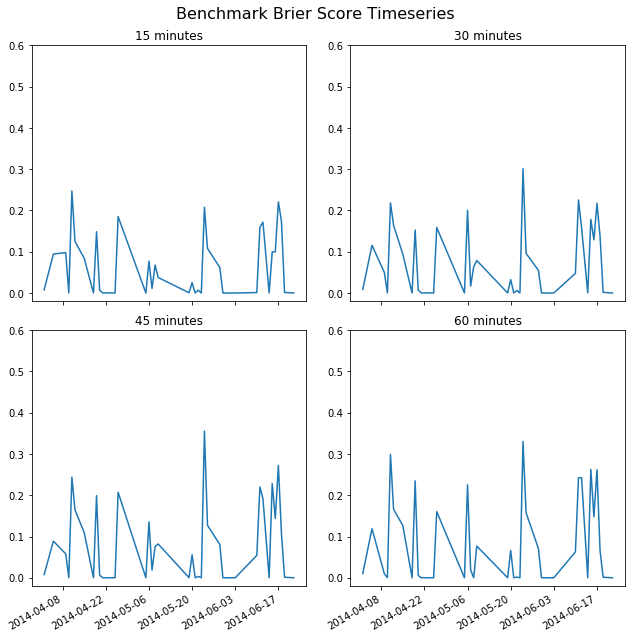

                      0            1
2014-04-02    0.0078775    0.0078775
2014-04-05    0.0943695      0.13926
2014-04-09    0.0979021      0.18694
2014-04-10  0.000360083  0.000360083
2014-04-11       0.2472     0.228301
2014-04-12     0.124962     0.138106
2014-04-15    0.0841739    0.0841739
2014-04-18            0            0
2014-04-19     0.148608     0.109719
2014-04-20   0.00731658   0.00731658
2014-04-21  2.84222e-05  2.84222e-05
2014-04-22  0.000135855  0.000135855
2014-04-25  1.09725e-05  1.09725e-05
2014-04-26     0.185104     0.150531
2014-05-05  5.53607e-08  5.53607e-08
2014-05-06    0.0770553    0.0770553
2014-05-07    0.0108186    0.0108186
2014-05-08    0.0676763    0.0564518
2014-05-09    0.0375037     0.047722
2014-05-19  0.000609369  0.000609369
2014-05-20     0.024945    0.0979361
2014-05-21  3.15556e-05  3.15556e-05
2014-05-22   0.00680572   0.00680572
2014-05-23  2.13374e-05  2.13374e-05
2014-05-24     0.207817      0.24642
2014-05-25     0.108058     0.142631
2

In [7]:
coord = 0
ymin= -0.02
ymax = 0.6
rows = 2; cols = 2;
fig,axarr = plt.subplots(rows,cols)
for r in range(rows):
    for c in range(cols):
        axarr[r,c].set_ylim([ymin,ymax])

axarr[0,0].plot(bs15.index,bs15.values[:,coord])
axarr[0,1].plot(bs30.index,bs30.values[:,coord])
axarr[1,0].plot(bs45.index,bs45.values[:,coord])
axarr[1,1].plot(bs60.index,bs60.values[:,coord])

axarr[0,0].set_title("15 minutes")
axarr[0,1].set_title("30 minutes")
axarr[1,0].set_title("45 minutes")
axarr[1,1].set_title("60 minutes")

fig.autofmt_xdate()
fig.tight_layout()
fig.suptitle("Benchmark Brier Score Timeseries",fontsize=16)
fig.subplots_adjust(top=0.92)
plt.show()
print(bs15)